In [86]:
# Libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import preprocessing

In [87]:
# import the dataset

patients = pd.read_csv('./Datasets for Assignment 3/patients.csv')
patients.head() 


,age,gender,pain,blood_pressure,cholesterol,blood_sugar,heart_rate,exercise,outcome
0,63,1,3,145,233,1,150,0,1
1,37,1,2,130,250,0,187,0,1
2,41,0,1,130,204,0,172,0,1
3,56,1,1,120,236,0,178,0,1
4,57,0,0,120,354,0,163,1,1


In [88]:
# Scale all the variables

patients_cluster = patients.drop('outcome',axis=1)
patients_cluster = patients_cluster.apply(lambda x: preprocessing.scale(x))

In [89]:

# Determine the optimal number of clusters using the elbow method
sse_clust = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(patients_cluster)
    sse_clust.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


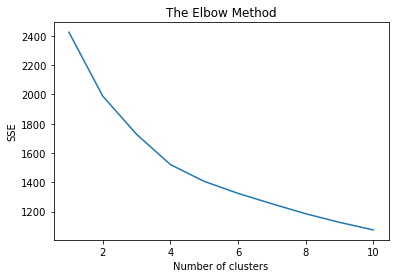

In [90]:
# showing the plot to identify the elbow visually
plt.plot(range(1, 11), sse_clust)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [91]:
# Creating model with two clusters

kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0)
cluster = kmeans.fit_predict(patients_cluster)
cluster

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,

In [92]:
# Number of observations in clusters
pd.Series(cluster).value_counts()

0    198
1    105
dtype: int64

In [93]:
# The average of each variable in each cluste

patients.groupby(cluster).mean()

,age,gender,pain,blood_pressure,cholesterol,blood_sugar,heart_rate,exercise,outcome
0,52.868687,0.631313,1.388889,129.388889,242.878788,0.126263,159.101010,0.045455,0.747475
1,57.190476,0.780952,0.171429,135.838095,252.647619,0.190476,131.819048,0.857143,0.161905


In [94]:
# As we can see, clustering identified the different genders, 
pd.crosstab(patients.gender, cluster)

col_0,0,1
gender,,
0,73,23
1,125,82


In [95]:
# As we can see, clustering identified the different the petients with blood sugar, 
pd.crosstab(patients.blood_sugar, cluster)

col_0,0,1
blood_sugar,,
0,173,85
1,25,20


In [96]:
# As we can see, clustering identified the different the petients with physical exercis
pd.crosstab(patients.exercise, cluster)

col_0,0,1
exercise,,
0,189,15
1,9,90


In [97]:
# create a new cluster

cluster_1 = kmeans.fit_predict(patients)
cluster_1



array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [98]:
# As we can see, previous cluster identified the different the petients with heart attack

# todo: discuss with your friends to identify the result 
# i didn't catch the actual question.

pd.crosstab(patients.outcome, cluster)

col_0,0,1
outcome,,
0,50,88
1,148,17


In [99]:
# new cluster identified the different the petients with heart attack

# todo: discuss with your friends to identify the result
# case: I didn't catch the actual question.
# 
pd.crosstab(patients.outcome, cluster_1)

col_0,0,1
outcome,,
0,78,60
1,115,50
